# Supervised Learning Project

In [1]:
# import libraries for Data preprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
sns.set_style('darkgrid')

from scipy.stats import ttest_ind,f_oneway,chi2_contingency  # for statistical analysis

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

# import libraries for Supervised Learning
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn import model_selection
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.multiclass import OneVsRestClassifier

# for target balancing
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import SMOTE

## PART I

### Project Description
### DOMAIN: 
Healthcare
### CONTEXT: 
Medical research university X is undergoing a deep research on patients with certain conditions. 
University has an internal AI team. Due to confidentiality the patient’s details and the conditions are masked by 
the client by providing different datasets to the AI team for developing a AIML model which can predict the 
condition of the patient depending on the received test results. 
### DATA DESCRIPTION:
The data consists of biomechanics features of the patients according to their current 
conditions. Each patient is represented in the data set by six biomechanics attributes derived from the shape and 
orientation of the condition to their body part.
1. P_incidence - pelvic_incidence
2. P_tilt - pelvic_tilt
3. L_angle - lumbar_lordosis_angle
4. S_slope - sacral_slope
5. P_radius - pelvic_radius
6. S_degree - spondylolisthesis_degree
7. Class - Type of Orthopedic

### 1. Data Warehouse

In [2]:
# Read the dataset

normal = pd.read_csv('Normal.csv')  # Normal Class dataset
type_h = pd.read_csv('Type_H.csv')  # Type_H class dataset
type_s = pd.read_csv('Type_S.csv')  #Type_S Class dataset

In [3]:
normal.head(5) # top 5 rows of normal dataset

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


In [4]:
# Size and shape of normal dataset

print(normal.shape)
print(normal.size)

(100, 7)
700


In [5]:
type_h.head(5)  # top 5 rows of type_h dataset

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Type_H
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Type_H
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Type_H
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Type_H
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Type_H


In [6]:
# Size and shape of type_h dataset

print(type_h.shape)
print(type_h.size)

(60, 7)
420


In [7]:
type_s.head(5)  # top 5 rows of type_s dataset

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,74.377678,32.053104,78.772013,42.324573,143.560690,56.125906,Type_S
1,89.680567,32.704435,83.130732,56.976132,129.955476,92.027277,Type_S
2,44.529051,9.433234,52.000000,35.095817,134.711772,29.106575,Type_S
3,77.690577,21.380645,64.429442,56.309932,114.818751,26.931841,Type_S
4,76.147212,21.936186,82.961502,54.211027,123.932010,10.431972,Type_S


In [8]:
# Size and shape of type_s dataset

print(type_s.shape)
print(type_s.size)

(150, 7)
1050


In [9]:
# Merge All class datasets

data = pd.concat([normal,type_h,type_s])
data.reset_index(drop=True, inplace=True)

In [10]:
data.head(5)  # top 5 rows of Combined dataset

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


In [11]:
# Size and shape of Combined Dataset

print(data.shape)
print(data.size)

(310, 7)
2170


### 2. Data Cleaning

In [12]:
# Display Attribute datatypes
data.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

In [13]:
# Check for values in Class Attribute
data['Class'].value_counts()

Type_S    133
Normal     73
Type_H     37
Nrmal      27
type_h     23
tp_s       17
Name: Class, dtype: int64

In [14]:
# Observation : there is Nrmal,tp_s,type_h are duplicate Classes
# Convert them to Original Classes
data['Class'] = data['Class'].replace({'Nrmal':'Normal','tp_s':'Type_S','type_h':'Type_H'})

In [15]:
# Observation : Class Attriibute is of Object type.
# convert Class Attribute to Category For Modeling the data

data['Class'] = data.Class.astype('category')

In [16]:
# Display Attribute datatypes
data.dtypes

P_incidence     float64
P_tilt          float64
L_angle         float64
S_slope         float64
P_radius        float64
S_Degree        float64
Class          category
dtype: object

In [17]:
# check for null values in the Attributes

data.isnull().sum()

# Observation : There is no null values in the dataset

P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64

### 3. Data Analysis & Visualization

In [18]:
# Statistical Analysis on Each Attribute

data.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


#### Univariate Analysis

<AxesSubplot:xlabel='S_Degree', ylabel='Count'>

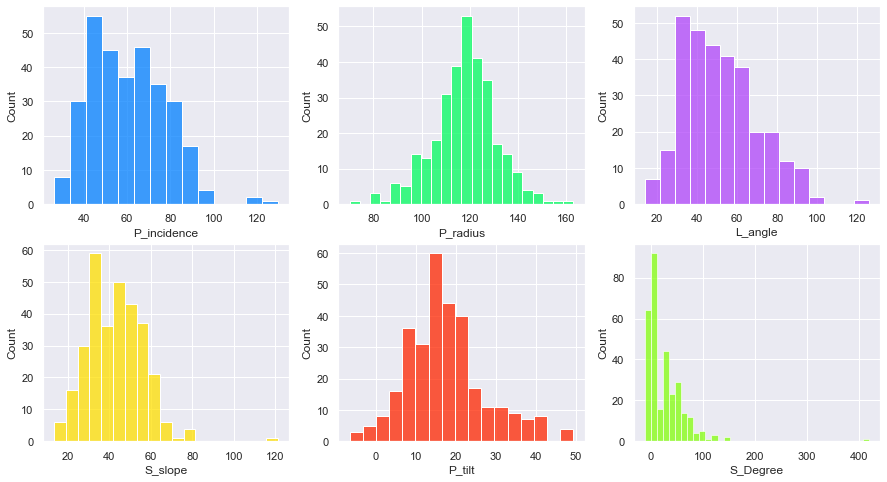

In [19]:
# plotting histogram plots for All the independent Columns in the Dataset
color = sns.color_palette("gist_ncar",6)
fig, ax = plt.subplots(2,3)
fig.set_figheight(8)
fig.set_figwidth(15)

sns.histplot(data['P_incidence'],color=color[0],ax=ax[0][0])
sns.histplot(data['P_radius'],color=color[1],ax=ax[0][1])
sns.histplot(data['L_angle'],color=color[5],ax=ax[0][2])
sns.histplot(data['S_slope'],color=color[3],ax=ax[1][0])
sns.histplot(data['P_tilt'],color=color[4],ax=ax[1][1])
sns.histplot(data['S_Degree'],color=color[2],ax=ax[1][2])

Observation : From above Histplots, we can see
    
    In p-incidence plot there are highly 55 observations are holding the value of range 45.In P_radius plot highly there are 55 observations are holding the value of range 120.In L_angle plot highly there are 55 observations are holding the value of range 30.In S-slope plot highly there are 58 observations are holding the value of range 30.In P-tilt plot highly there are 60 observations are holding the value of range 15.In S-degree plot highly there are 95 observations are holding the value of range 0-10.
    So from Above Visualization we can conclude that Every Column have the 50+ observations within the Same range of Values.  
    
    

<AxesSubplot:xlabel='S_Degree'>

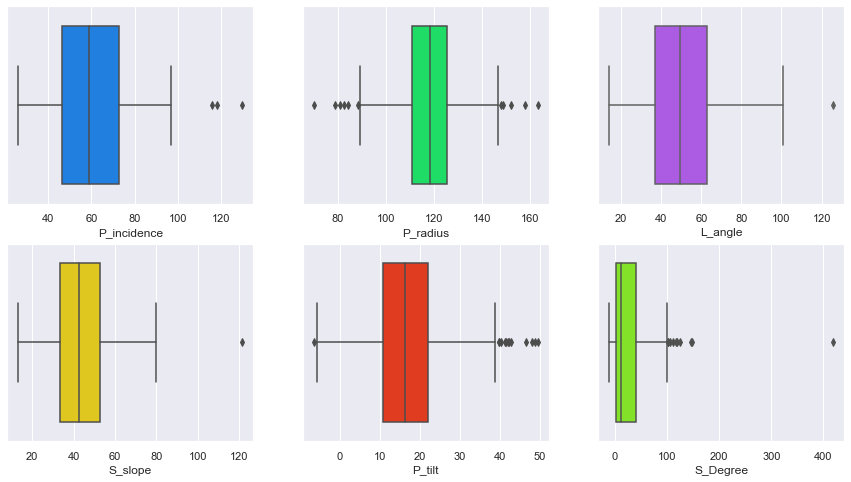

In [20]:
# plotting distribution plots for All the independent Columns in the Dataset 

color = sns.color_palette("gist_ncar",6)
fig, ax = plt.subplots(2,3)
fig.set_figheight(8)
fig.set_figwidth(15)

sns.boxplot(data['P_incidence'],color=color[0],ax=ax[0][0])

sns.boxplot(data['P_radius'],color=color[1],ax=ax[0][1])

sns.boxplot(data['L_angle'],color=color[5],ax=ax[0][2])

sns.boxplot(data['S_slope'],color=color[3],ax=ax[1][0])

sns.boxplot(data['P_tilt'],color=color[4],ax=ax[1][1])

sns.boxplot(data['S_Degree'],color=color[2],ax=ax[1][2])

Observation : From above Boxplot, we can see that 3 Columns (P_radius,P_tilt,S_degree) Contains the moreoutliers in the data and  the remaining columns contains less no of outliers.
   
    In P_incidence plot most of the values are lied between range 30 to 100.In P_radius plot most of the values are lied between range 90be to 145.In L_angle plot most of the values are lied between range 10 to 100.In S_slope plot most of the values are lied between range 10 to 80.In P_tilt we seen that the plot range is in negative so by that we can conclude that P-tilt have the negative values in the dataset and most of the values are lied between range -10 to 40.In S_degree plot most of the values are lied between range 0 to 100.But there are too many outliers in the s-degree data.


#### Bivariate Analysis

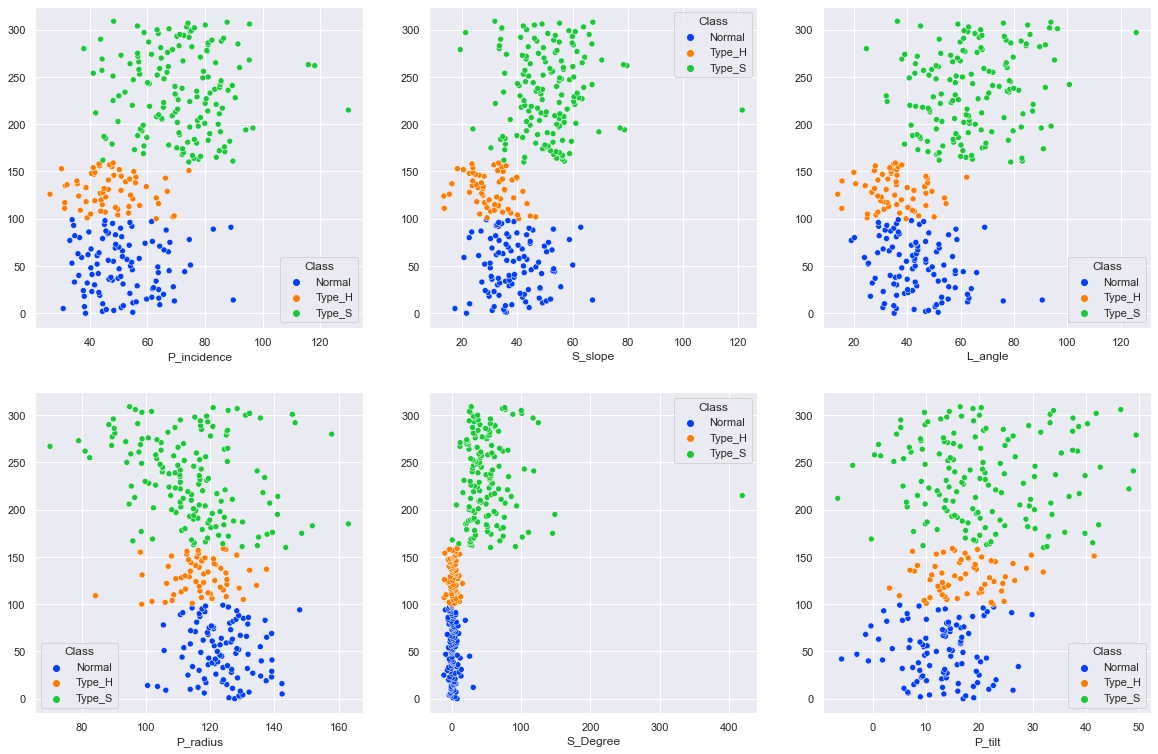

In [21]:
# plotting Scatter plots for P_incidence,S-slope,L_angle based on Type of class.

fig, ax = plt.subplots(2, 3)

fig.set_figheight(13)
fig.set_figwidth(20)

sns.scatterplot(x=data['P_incidence'],y=data.index, ax = ax[0][0],hue=data['Class'],palette='bright')
sns.scatterplot(x=data['S_slope'],y=data.index, ax = ax[0][1],hue=data['Class'],palette='bright')
sns.scatterplot(x=data['L_angle'],y=data.index,ax=ax[0][2],hue=data['Class'],palette='bright')
sns.scatterplot(x=data['P_radius'],y=data.index, ax = ax[1][0],hue=data['Class'],palette='bright')
sns.scatterplot(x=data['S_Degree'],y=data.index, ax = ax[1][1],hue=data['Class'],palette='bright')
sns.scatterplot(x=data['P_tilt'],y=data.index,ax=ax[1][2],hue=data['Class'],palette='bright')

plt.show()

Observation : From above plots, We can see P-incidence,S-slope,l-angle and s-degree plots contains the Values of Type-s Class are different from the other classes. Type_s Class values higher than the other two classes so we can say that if value is high then it belongs to type-s Class.Where Remaining 2 plots have the smiliar. All the call values are in same range.

<AxesSubplot:>

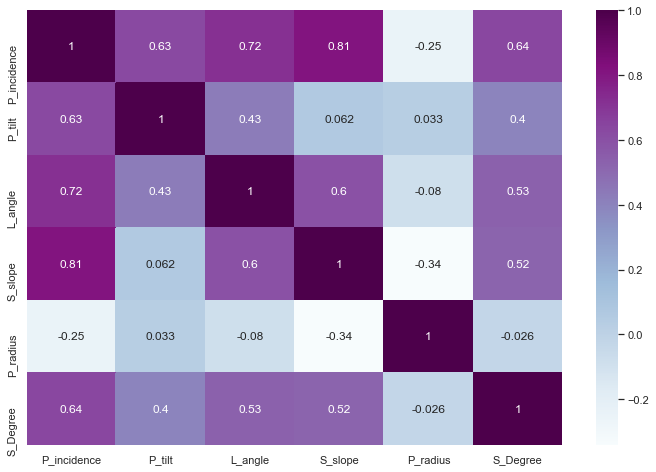

In [22]:
# plotting heatmap for Correlation of data

fig_dims = (12, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(data.corr(),annot=True,cmap="BuPu")

Observation : From above plot, We can say that Darkblue colored box has the High Correlation and White Colored box has low Correlation 
      
    From above Plot we seen that p-incidence and s-slope has high correlation than the other pairs which is of 0.81. Most of the Attributes are correlated with 0.60 with other attributes and the ;east correlated pair is p-radius and s-slope with -0.34 Correlation.

<AxesSubplot:xlabel='S_slope', ylabel='S_Degree'>

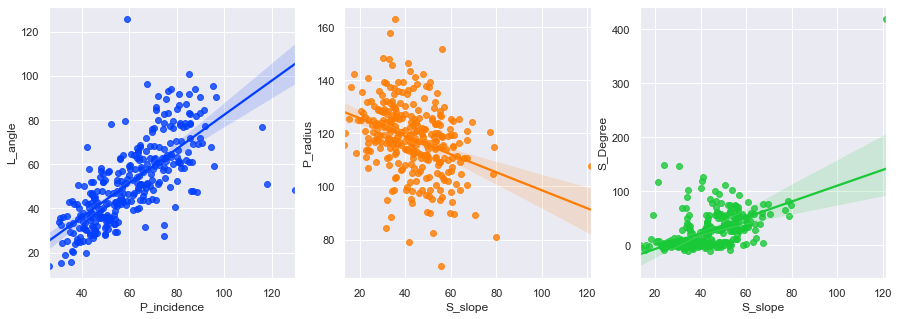

In [23]:
# plotting Regression plot for p_incidence and S-slope

color = sns.color_palette("bright",6)
fig, ax = plt.subplots(1,3)

fig.set_figheight(5)
fig.set_figwidth(15)

sns.regplot(x=data['P_incidence'],y=data['L_angle'],ax = ax[0],color=color[0])
sns.regplot(x=data['S_slope'],y=data['P_radius'],ax=ax[1],color=color[1])
sns.regplot(x=data['S_slope'],y=data['S_Degree'],ax=ax[2],color=color[2])


 From above plots, We can say that S-slope and p-incidence are linearly correlative. there is no linear correlation between P-radius and l-angle.

<AxesSubplot:xlabel='Class', ylabel='L_angle'>

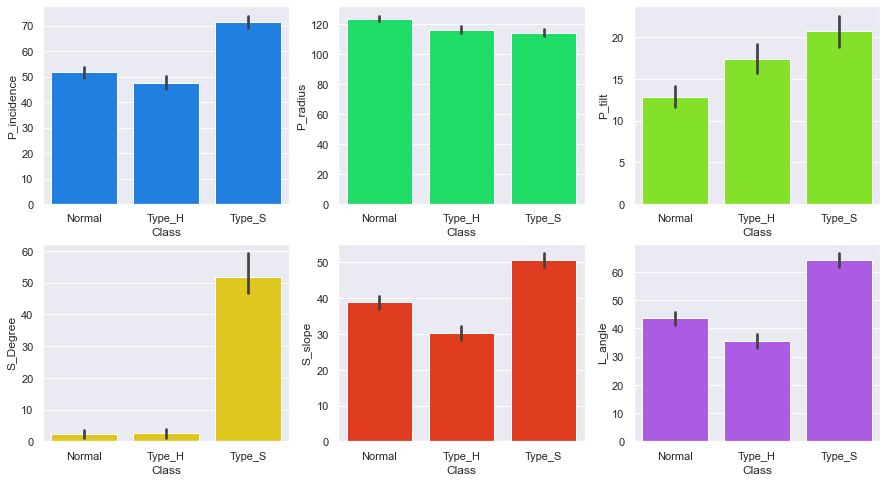

In [24]:
# plotting bar plots for Continuous varibales on type of class.

color = sns.color_palette("gist_ncar",6)
fig, ax = plt.subplots(2,3)
fig.set_figheight(8)
fig.set_figwidth(15)

sns.barplot(x=data['Class'],y=data['P_incidence'],color=color[0],ax=ax[0][0])
sns.barplot(x=data['Class'],y=data['P_radius'],color=color[1],ax=ax[0][1])
sns.barplot(x=data['Class'],y=data['P_tilt'],color=color[2],ax=ax[0][2])
sns.barplot(x=data['Class'],y=data['S_Degree'],color=color[3],ax=ax[1][0])
sns.barplot(x=data['Class'],y=data['S_slope'],color=color[4],ax=ax[1][1])
sns.barplot(x=data['Class'],y=data['L_angle'],color=color[5],ax=ax[1][2])

 From above Bar plots, in plot 4 we seen that Type-s class has the big difference int the values when compare to other two classes.Where in p-radius plot All the classes seems like same.Other than p-radius in remaining plots Type-s class have the majority in all the plots.

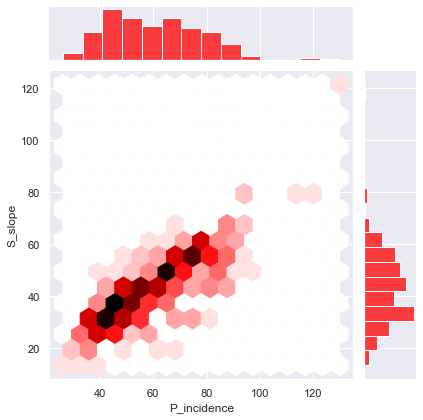

In [25]:
# plotting jointplot for P-incidence and s-slope

sns.jointplot(data['P_incidence'],data['S_slope'],kind="hex",color='red')

Observation : From above plot, we can see
    
    There is a linear realtion between the columns.there are some black hexagons tells that there are more values in the area.We can also obeserve there is no big difference between the values.s-slope directly proportion to p-incidence.

#### Multivariate Analysis

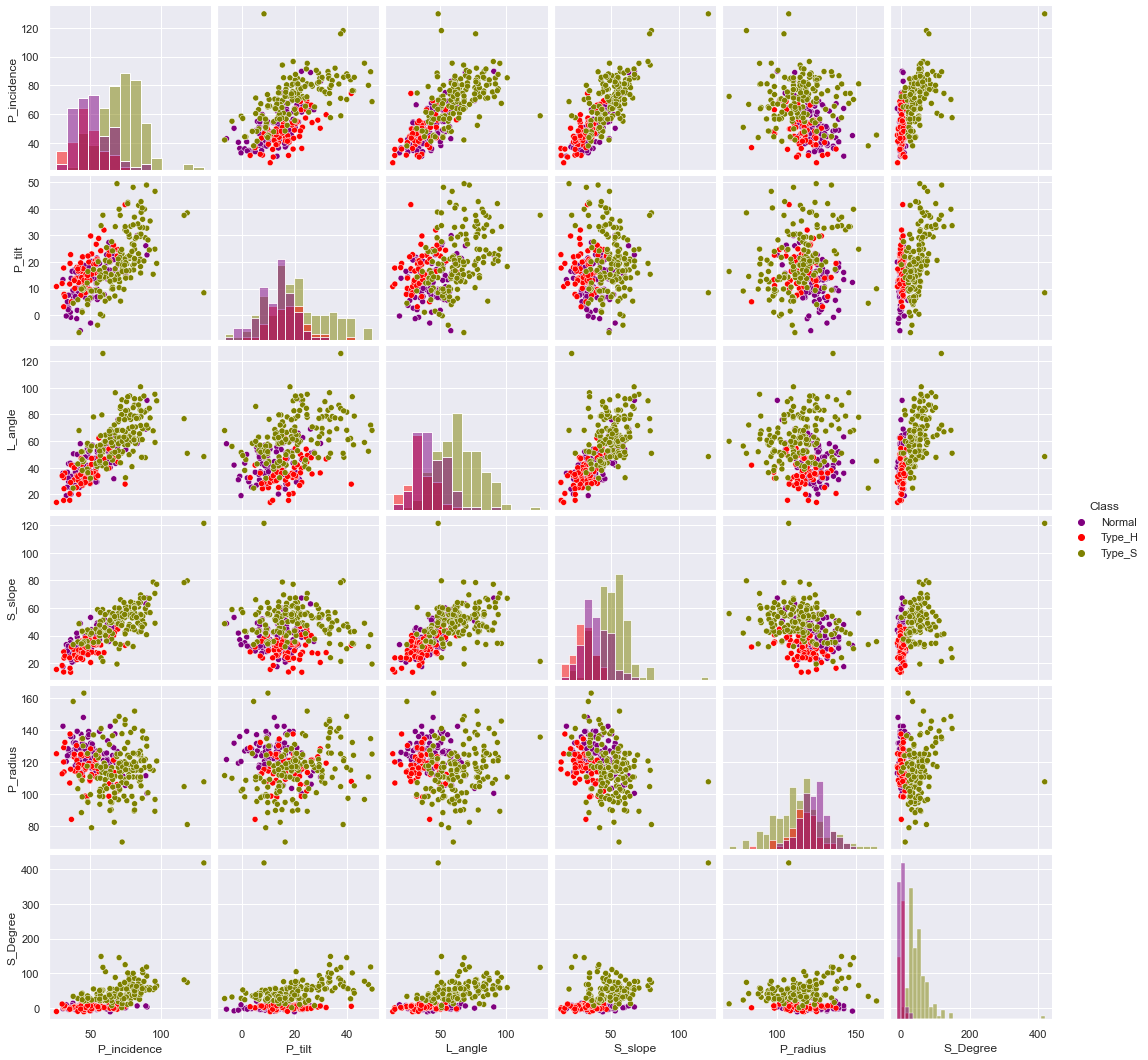

In [26]:
# plotting pairplot for the data

sns.pairplot(data,hue='Class',diag_kind='hist',palette='brg')

Observation : From above plot, we can see the relation between the attributes in the dataset. Normal,Type_H classes are lied mostly in same range but Type_s Class is different from the two most of the S-type values are in different range.

#### Statistical Anlysis

In [27]:
# mean of Attributes of the three different Classes

data.groupby(['Class']).mean()

# Observation: Type_s class means are different in every column when compare to remining two classes.

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
Class,,,,,,
Normal,51.685244,12.821414,43.542605,38.863830,123.890834,2.186572
Type_H,47.638407,17.398795,35.463524,30.239612,116.474968,2.480251
Type_S,71.514224,20.748038,64.110108,50.766186,114.518810,51.896687


#### We are Analyzing Multiple classes and Our sample size is too large so we should use ANOVA (Z Test)
#### Assuming Hypothesis
* $H_0$: For continuous varibales all the three Classes are Similar
* $H_A$: For continuous varibales all the three Classes are not similar

In [28]:
cols = data.columns[0:6]
groups = pd.unique(data.Class.values)

for col in cols:
    d_data = {group:data[col][data.Class == group] for group in groups}
    F, p = f_oneway(d_data['Normal'], d_data['Type_H'], d_data['Type_S'])
    if p<0.05:
        print("There is significant difference between Three classes for ",col,".So, We reject the null hypothesis\n")
    else:
        print("There is no significant difference between Three classes for",col,".So, We accept the null hypothesis\n")
    

There is significant difference between Three classes for  P_incidence .So, We reject the null hypothesis

There is significant difference between Three classes for  P_tilt .So, We reject the null hypothesis

There is significant difference between Three classes for  L_angle .So, We reject the null hypothesis

There is significant difference between Three classes for  S_slope .So, We reject the null hypothesis

There is significant difference between Three classes for  P_radius .So, We reject the null hypothesis

There is significant difference between Three classes for  S_Degree .So, We reject the null hypothesis



From above statistical analysis all the Classes are not similar in any Variable in the Dataset. So, We can use all the independent variables for Modeling.

### 4. Data Preprocessing

In [29]:
# From Above plots We seen there are outliers in the Dataset
# replace the outliers with the mean of the data.

columns = data.iloc[:,:-1].columns
for col in columns:
    # 1st quartile
    Q1 = np.percentile(data[col],25)
    # 3rd quartile
    Q3 = np.percentile(data[col],75)
    # IQR
    IQR = Q3 - Q1
    # upper Bound
    upper = Q3 + 1.5*IQR
    # Lower bound
    lower = Q1-1.5*IQR
    # Count for Outliers before converting
    print('Outliers Before replacing Median',col,': ',data[col].loc[(data[col] > upper) | (data[col] < lower)].count())
    # replacing median in outliers
    data[col]= data[col].mask(data[col] > upper, data[col].mean())
    data[col]= data[col].mask(data[col] < lower, data[col].mean())
    
    print('Outliers After replacing Median',col,': ',data[col].loc[(data[col] > upper) | (data[col] < lower)].count(),'\n\n')

Outliers Before replacing Median P_incidence :  3
Outliers After replacing Median P_incidence :  0 


Outliers Before replacing Median P_tilt :  13
Outliers After replacing Median P_tilt :  0 


Outliers Before replacing Median L_angle :  1
Outliers After replacing Median L_angle :  0 


Outliers Before replacing Median S_slope :  1
Outliers After replacing Median S_slope :  0 


Outliers Before replacing Median P_radius :  11
Outliers After replacing Median P_radius :  0 


Outliers Before replacing Median S_Degree :  10
Outliers After replacing Median S_Degree :  0 




In [30]:
# Create a separate dataframe consisting only of the features i.e independent attributes

X = data.drop(labels='Class',axis=1)
y = data['Class'].cat.codes  # Dependent variable or Target variable

In [31]:
# Performing Normalization for our Independent attributes

X = (X-np.min(X))/(np.max(X)-np.min(X))
X.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,0.478806,0.503535,0.434528,0.442251,0.502807,0.299867
std,0.228903,0.188476,0.208326,0.190815,0.198442,0.226684
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.287655,0.371136,0.265147,0.301232,0.384689,0.113712
50%,0.461543,0.499255,0.409969,0.437792,0.500593,0.204994
75%,0.654741,0.602448,0.564473,0.589620,0.627877,0.441873
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


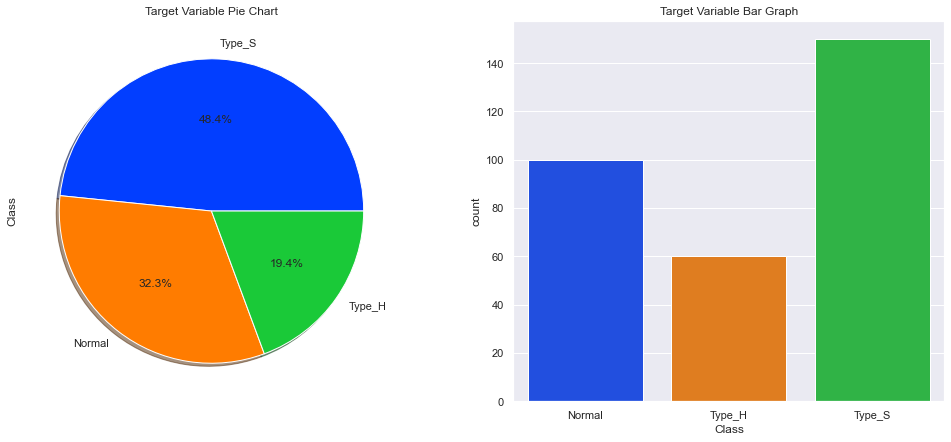

In [32]:
# Checking for target Balancing

color= sns.color_palette('bright')
f,axes=plt.subplots(1,2,figsize=(17,7))
data['Class'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0],shadow=True,colors=color)
sns.countplot(data['Class'],ax=axes[1],palette='bright')
axes[0].set_title('Target Variable Pie Chart')
axes[1].set_title('Target Variable Bar Graph')
plt.show()

From Above plot We can see that the target variable is  Unbalanced. because there are 150 Observations for Type_s,100 observations for Normal Class and 60 Observations of Type_H.It will decrease the Accuracy of the model.To handle with Target Balance We have Many Techniques like., UnderSampling, SMOTE etc,.

In [33]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

### 5. Model training, testing and tuning:

In [34]:
# Building Knn model for 5 neighbors.

KNN = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance')

# Call Nearest Neighbour algorithm

KNN.fit(X_train, y_train)

# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
# be assigned to the test data point

print("Classification Accuracy for Train data : %0.2f" %(KNN.score(X_train, y_train)*100))
print("Classification Accuracy for Test data : %0.2f" %(KNN.score(X_test, y_test)*100))

# predict the values

predicted_labels = KNN.predict(X_test)

# Classification for Predicting and testing data

print("Classification Report")
print(metrics.classification_report(y_test,predicted_labels))

Classification Accuracy for Train data : 100.00
Classification Accuracy for Test data : 76.34
Classification Report
              precision    recall  f1-score   support

           0       0.64      0.64      0.64        28
           1       0.53      0.53      0.53        17
           2       0.92      0.92      0.92        48

    accuracy                           0.76        93
   macro avg       0.70      0.70      0.70        93
weighted avg       0.76      0.76      0.76        93



 We are getting 76% accuracy for training Data Where neighbors is 5

#### Observation :
    From above Classification report knn we can see precision and Recall values are equal for All the classes so we need to decrease the percison value to get a good model.Where is Accuracy is 76% which is modearate so should increase Accuracy Also bye finfind the remaining models Accuracy

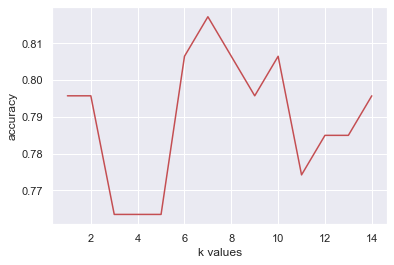

In [35]:
# find the best value of k value

score_list = []
for i in range(1,15):
    KNN2 = KNeighborsClassifier(n_neighbors = i, weights = 'distance')
    KNN2.fit(X_train,y_train)
    score_list.append(KNN2.score(X_test,y_test))
    
plt.plot(range(1,15),score_list,color = 'r')
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()

 Observation:
    From above graph we can see that when the k is 7 then the accuracy got 82%

<AxesSubplot:>

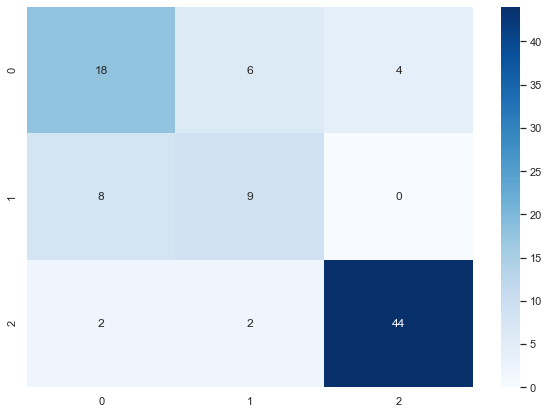

In [36]:
# Display confusion matrix
conf_mat = metrics.confusion_matrix(y_test, predicted_labels)
df_conf_mat = pd.DataFrame(conf_mat)
plt.figure(figsize = (10,7))
sns.heatmap(df_conf_mat, annot=True,cmap='Blues', fmt='g')

Observation: From above heatmap we can see type 2 classes where predicted that tha actual 2 was 44 and class 0 predicted actual 0 are 18 and class 1 predicted 1 are 9.We can conclude that 1 class Accuracy is too less in prediction.

 We have less Accuracy in the model. So lets perform smote on All data and See the model performance

In [37]:
# balancing the target variable using SMOTE
smote_nc=SMOTENC(categorical_features=[5],random_state=1) #specifying categorical column numbers
X_train_s,y_train_s=smote_nc.fit_resample(X_train,y_train)

In [38]:
# Building Knn model for 5 neighbors.

KNN = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance')

# Call Nearest Neighbour algorithm

KNN.fit(X_train_s, y_train_s)

# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
# be assigned to the test data point

print("Classification Accuracy for Train data : %0.2f" %(KNN.score(X_train_s, y_train_s)*100))
print("Classification Accuracy for Test data : %0.2f" %(KNN.score(X_test, y_test)*100))

# predict the values

predicted_labels = KNN.predict(X_test)

# Classification for Predicting and testing data

print("Classification Report")
print(metrics.classification_report(y_test,predicted_labels))

Classification Accuracy for Train data : 100.00
Classification Accuracy for Test data : 79.57
Classification Report
              precision    recall  f1-score   support

           0       0.77      0.61      0.68        28
           1       0.56      0.82      0.67        17
           2       0.93      0.90      0.91        48

    accuracy                           0.80        93
   macro avg       0.76      0.78      0.75        93
weighted avg       0.82      0.80      0.80        93



Observation : We can see After Smote on train data Accuracy is increased.So Smote will be used for model building.

#### Performing modeling for remaining Supervised Algorithms

In [39]:
# Logistic regression model

LR_model=LogisticRegression()

LR_model.fit(X_train_s,y_train_s)

print("Classification Accuracy for Train data : %0.2f" %(LR_model.score(X_train_s, y_train_s)*100))
print("Classification Accuracy for Test data : %0.2f" %(LR_model.score(X_test, y_test)*100))

# predict the values

lr_predicts = LR_model.predict_proba(X_test)
lr_predict = LR_model.predict(X_test)

# Classification for Predicting and testing data

print("\nClassification Report")
print(metrics.classification_report(y_test,lr_predict))

Classification Accuracy for Train data : 85.62
Classification Accuracy for Test data : 80.65

Classification Report
              precision    recall  f1-score   support

           0       0.79      0.68      0.73        28
           1       0.58      0.88      0.70        17
           2       0.95      0.85      0.90        48

    accuracy                           0.81        93
   macro avg       0.77      0.81      0.78        93
weighted avg       0.84      0.81      0.81        93



In [40]:
# Apply Naive Bayes Classifier.

NB = GaussianNB()
NB.fit(X_train_s,y_train_s.ravel())

NB_predict = NB.predict(X_test)

print('Accuracy on Training data:',NB.score(X_train_s, y_train_s) )
print('Accuracy on Test data:',NB.score(X_test, y_test) )
print("\nclassification  Report For Naive Bayes Classifier:\n",metrics.classification_report(y_test,NB_predict))

Accuracy on Training data: 0.8627450980392157
Accuracy on Test data: 0.7741935483870968

classification  Report For Naive Bayes Classifier:
               precision    recall  f1-score   support

           0       0.67      0.50      0.57        28
           1       0.57      0.76      0.65        17
           2       0.92      0.94      0.93        48

    accuracy                           0.77        93
   macro avg       0.72      0.73      0.72        93
weighted avg       0.78      0.77      0.77        93



In [41]:
# Apply Naive Bayes Classifier.

svm_model = svm.SVC()
svm_model.fit(X_train_s,y_train_s)

svm_predict = svm_model.predict(X_test)

print('Accuracy on Training data:',svm_model.score(X_train_s, y_train_s) )
print('Accuracy on Test data:',svm_model.score(X_test, y_test) )
print("\nclassification  Report For Support vector machine:\n",metrics.classification_report(y_test,svm_predict))

Accuracy on Training data: 0.9019607843137255
Accuracy on Test data: 0.8172043010752689

classification  Report For Support vector machine:
               precision    recall  f1-score   support

           0       0.78      0.64      0.71        28
           1       0.56      0.82      0.67        17
           2       0.98      0.92      0.95        48

    accuracy                           0.82        93
   macro avg       0.77      0.79      0.77        93
weighted avg       0.84      0.82      0.82        93



 Observation : From above models We can say KNN will be the best when comapre to other models beacuse recall value is greater than the Percision value.

#### ROC curves For Multiclasses

Area under the ROC curve for KNN :(Class 0 vs Rest) 0.898901
Area under the ROC curve for KNN :(Class 1 vs Rest) 0.941176
Area under the ROC curve for KNN :(Class 2 vs Rest) 0.981944


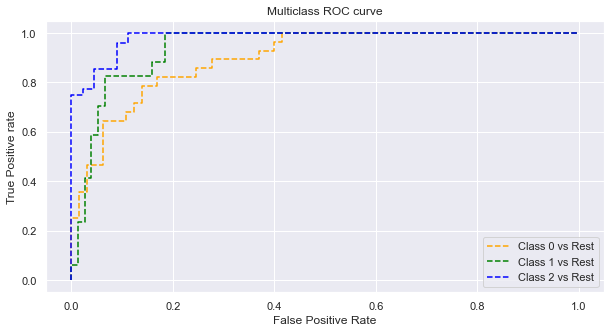

In [42]:
# fit regression model
clf = OneVsRestClassifier(LogisticRegression())
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc={}
n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])
    print("Area under the ROC curve for KNN :(Class", i,"vs Rest) %f" % roc_auc[i])
    
# plotting   
plt.figure(figsize=(10,5))
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300); 

#### Tunning

In [43]:
# performing GridSearchCV

knn1 = KNeighborsClassifier()

param_grid={'n_neighbors':[3,5,7,9,11,13,15,17,19],
            'weights':['distance','uniform'],
            'algorithm':['auto','ball_tree','kd_tree','brute'],
            'metric':['manhattan','euclidean']}
grid=GridSearchCV(knn1,param_grid=param_grid,verbose=1,n_jobs=-1)
grid_res = grid.fit(X_train_s,y_train_s) # fit the training varibales

print('For GridSearchCV:')
print("Best Accuracy is : %f" %(grid_res.best_score_))
print('With Parameters :',grid_res.best_params_)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
For GridSearchCV:
Best Accuracy is : 0.888736
With Parameters : {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


In [44]:
# performing RandomizedSearchCV

knn2 = KNeighborsClassifier()

rand = RandomizedSearchCV(knn2, param_grid,random_state=1)
rand_res = rand.fit(X_train_s, y_train_s)

print('For RandomizedSearchCV:')
print("Best Score is : %f" %(rand_res.best_score_))
print('With Parameters :',rand_res.best_params_)

For RandomizedSearchCV:
Best Score is : 0.888736
With Parameters : {'weights': 'distance', 'n_neighbors': 3, 'metric': 'manhattan', 'algorithm': 'brute'}


#### Observation: For Selecting Best Model
    from above All tuning techiniques and models We can see that two Tuning techniques gives the same accuracy 89% With same parameters as negihbors 3 and metric is manhattan.

## Conclusion:

    After balancing the train data Accuray is increased. so it tells than Target balance is helpfull for model prediction.
    From above Analysis when we perform gridsearch and randomized search then the accuracy is good.
    It could be used to perform well for classify the classes.
    Where from above Model Type_s Class is predicted accurately with 96% of true rate When Compare to Other Classes.
    

## Improvisation:
    In Future the data should have,
    1. Type of treatment (Surgery or non-Surgical) can be use For target class.
    2. Cause of the Orthopaedics.
    3. Detailed Information About the Columns in the data.
    4. Same no of Observations for All classes improves model Accuracy.
    5. Spinal canal Column which is used for future Analysis.

# 

# 

### --------------------------------------------------------------------------------------------------------------------------------------------------------------

# 

# 

## PART II

### Project Description
### DOMAIN: 
Banking and finance
### CONTEXT: 
A bank X is on a massive digital transformation for all its departments. Bank has a growing customer base whee 
majority of them are liability customers (depositors) vs borrowers (asset customers). The bank is interested in expanding the 
borrowers base rapidly to bring in more business via loan interests. A campaign that the bank ran in last quarter showed an 
average single digit conversion rate. Digital transformation being the core strength of the business strategy, marketing 
department wants to devise effective campaigns with better target marketing to increase the conversion ratio to double digit 
with same budget as per last campaign. 
### DATA DESCRIPTION:
The data consists of the following attributes: 
1. ID  :  Customer ID
2. Age  :  Customer’s approximate age.
3. CustomerSince  :  Customer of the bank since. [unit is masked]
4. HighestSpend  :  Customer’s highest spend so far in one transaction. [unit is masked]
5. ZipCode  :  Customer’s zip code.
6. HiddenScore  :  A score associated to the customer which is masked by the bank as an IP.
7. MonthlyAverageSpend  :  Customer’s monthly average spend so far. [unit is masked]
8. Level  :  A level associated to the customer which is masked by the bank as an IP.
9. Mortgage  :  Customer’s mortgage. [unit is masked]
10. Security  :  Customer’s security asset with the bank. [unit is masked]
11. FixedDepositAccount  :  Customer’s fixed deposit account with the bank. [unit is masked]
12. InternetBanking  :  if the customer uses internet banking.
13. CreditCard  :  if the customer uses bank’s credit card.
14. LoanOnCard  :  if the customer has a loan on credit card.

### 1. Data warehouse

In [45]:
# reading datasets

data_1 = pd.read_csv('Part2 - Data1.csv') # dataset-1
data_2 = pd.read_csv('Part2 -Data2.csv')  # dataset-2

In [46]:
# first 5 rows in the dataset-1.

data_1.head(5)

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
0,1,25,1,49,91107,4,1.6,1
1,2,45,19,34,90089,3,1.5,1
2,3,39,15,11,94720,1,1.0,1
3,4,35,9,100,94112,1,2.7,2
4,5,35,8,45,91330,4,1.0,2


In [47]:
# shape of the Data-1

data_1.shape

(5000, 8)

In [48]:
# first 5 rows in the dataset-2

data_2.head()

,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,0,1,0,0,0,NaN
1,2,0,1,0,0,0,NaN
2,3,0,0,0,0,0,NaN
3,4,0,0,0,0,0,NaN
4,5,0,0,0,0,1,NaN


In [49]:
# shape of the data-2

print(data_2.shape)

(5000, 7)


In [50]:
# merging the 2 datasets.

data_customer = pd.merge(data_1,data_2,on = 'ID',how ='outer')

In [51]:
# first 5 rows in the customer data.

data_customer.head(5)

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN


In [52]:
# shape of the data.

data_customer.shape

(5000, 14)

### 2. Data Cleaning

In [53]:
# From dataset we have seen categorical vales. lets find value_counts in the Every column.

col=['HiddenScore','Level','Security','FixedDepositAccount', 'InternetBanking', 'CreditCard', 'LoanOnCard','Mortgage']
for i in range(0,len(col)):
    print(data_customer[col[i]].value_counts(),'\n')

# Observation : We have seen Expect Mortgage column remaining columns contains the categorical values.

1    1472
2    1296
4    1222
3    1010
Name: HiddenScore, dtype: int64 

1    2096
3    1501
2    1403
Name: Level, dtype: int64 

0    4478
1     522
Name: Security, dtype: int64 

0    4698
1     302
Name: FixedDepositAccount, dtype: int64 

1    2984
0    2016
Name: InternetBanking, dtype: int64 

0    3530
1    1470
Name: CreditCard, dtype: int64 

0.0    4500
1.0     480
Name: LoanOnCard, dtype: int64 

0      3462
98       17
103      16
119      16
83       16
       ... 
541       1
509       1
505       1
485       1
577       1
Name: Mortgage, Length: 347, dtype: int64 



In [54]:
# datatypes of the data.

data_customer.dtypes

# Observation : Columns of categorical values are of type int and float so convert it to categorical columns

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object

In [55]:
# Convert int and float type of Categorical columns to categorical.

for i in col[:-1]:
    data_customer[i] = data_customer[i].astype('category')

In [56]:
# datatypes of the data after converting categorical columns.

data_customer.dtypes

ID                        int64
Age                       int64
CustomerSince             int64
HighestSpend              int64
ZipCode                   int64
HiddenScore            category
MonthlyAverageSpend     float64
Level                  category
Mortgage                  int64
Security               category
FixedDepositAccount    category
InternetBanking        category
CreditCard             category
LoanOnCard             category
dtype: object

In [57]:
# Checking for info for dataset

data_customer.info()

# Observation:loan-on-card have some missing values.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   5000 non-null   int64   
 1   Age                  5000 non-null   int64   
 2   CustomerSince        5000 non-null   int64   
 3   HighestSpend         5000 non-null   int64   
 4   ZipCode              5000 non-null   int64   
 5   HiddenScore          5000 non-null   category
 6   MonthlyAverageSpend  5000 non-null   float64 
 7   Level                5000 non-null   category
 8   Mortgage             5000 non-null   int64   
 9   Security             5000 non-null   category
 10  FixedDepositAccount  5000 non-null   category
 11  InternetBanking      5000 non-null   category
 12  CreditCard           5000 non-null   category
 13  LoanOnCard           4980 non-null   category
dtypes: category(7), float64(1), int64(6)
memory usage: 347.4 KB


In [58]:
# check for null values in the datatype.

data_customer.isnull().sum()

# observation : we have 20 missing values in Loan on card, So Drop the rows beacuse we have less no of missing values.

ID                      0
Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

In [59]:
# Drop the null values
data_customer.dropna(inplace=True)
data_customer.isnull().sum()

ID                     0
Age                    0
CustomerSince          0
HighestSpend           0
ZipCode                0
HiddenScore            0
MonthlyAverageSpend    0
Level                  0
Mortgage               0
Security               0
FixedDepositAccount    0
InternetBanking        0
CreditCard             0
LoanOnCard             0
dtype: int64

In [60]:
# there is no use for ID column fo0r modeling.so,drop it.

data_customer.drop(columns='ID',inplace=True,axis=1)

### 3. Data analysis & visualisation

In [61]:
# Statistical Analysis on Each Attribute

data_customer.describe()

,Age,CustomerSince,HighestSpend,ZipCode,MonthlyAverageSpend,Mortgage
count,4980.000000,4980.000000,4980.00000,4980.000000,4980.000000,4980.000000
mean,45.352610,20.117671,73.85241,93152.420482,1.939536,56.589759
std,11.464212,11.468716,46.07009,2123.660073,1.750006,101.836758
min,23.000000,-3.000000,8.00000,9307.000000,0.000000,0.000000
25%,35.000000,10.000000,39.00000,91911.000000,0.700000,0.000000
50%,45.000000,20.000000,64.00000,93407.000000,1.500000,0.000000
75%,55.000000,30.000000,98.00000,94608.000000,2.525000,101.000000
max,67.000000,43.000000,224.00000,96651.000000,10.000000,635.000000


#### univariate Analysis

 For Numerical variables.

<AxesSubplot:xlabel='Mortgage', ylabel='Density'>

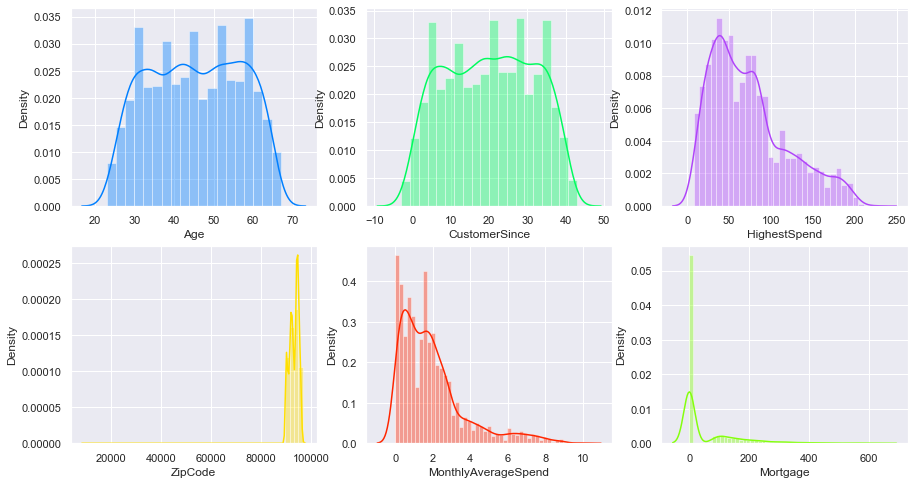

In [62]:
# plotting histogram plots for All the independent Columns in the Dataset
color = sns.color_palette("gist_ncar",6)
fig, ax = plt.subplots(2,3)
fig.set_figheight(8)
fig.set_figwidth(15)

sns.distplot(data_customer['Age'],color=color[0],ax=ax[0][0])
sns.distplot(data_customer['CustomerSince'],color=color[1],ax=ax[0][1])
sns.distplot(data_customer['HighestSpend'],color=color[5],ax=ax[0][2])
sns.distplot(data_customer['ZipCode'],color=color[3],ax=ax[1][0])
sns.distplot(data_customer['MonthlyAverageSpend'],color=color[4],ax=ax[1][1])
sns.distplot(data_customer['Mortgage'],color=color[2],ax=ax[1][2])

Observation : From above plots We can say,
    
    Age Column tells that most of the people's age is in between 25-65 and it has normality in the data.
    CustomerSince column is similar to the age column that most of the customers are Since 5-35 and are masked.
    In HighestSpend column most of the customers spending in between 20-100 and units are masked.We have seen positive skewness in the data.
    Zipcode is a Area Code So we won't use it for Analysis and there is no proper distribution.
    MonthlyAverageSpend column has huge psitive skewness in the data. most of the customers Spend in between 1-3 andd there are some customers who spend >10.
    Mortgage Column there are high no of 0's tells that most of the customers don't have the mortgage and there is no proper distribution.

<AxesSubplot:xlabel='Mortgage'>

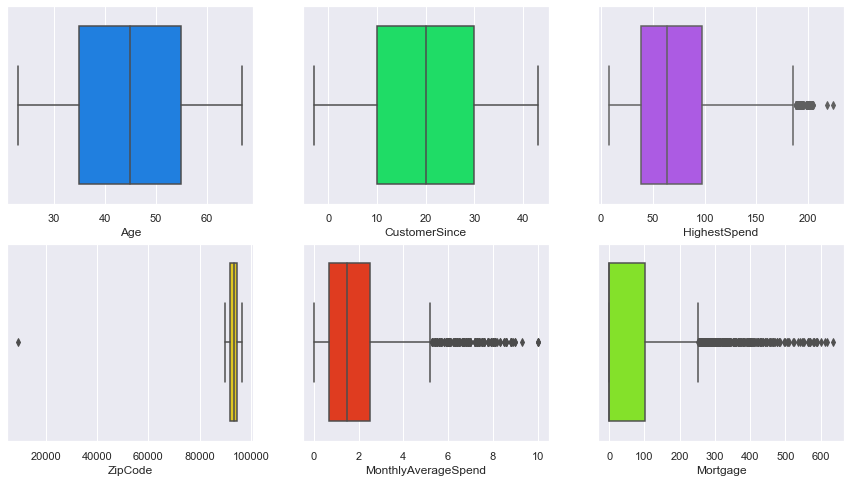

In [63]:
# plotting For plots for All the independent Columns in the Dataset 

color = sns.color_palette("gist_ncar",6)
fig, ax = plt.subplots(2,3)
fig.set_figheight(8)
fig.set_figwidth(15)

sns.boxplot(data_customer['Age'],color=color[0],ax=ax[0][0])

sns.boxplot(data_customer['CustomerSince'],color=color[1],ax=ax[0][1])

sns.boxplot(data_customer['HighestSpend'],color=color[5],ax=ax[0][2])

sns.boxplot(data_customer['ZipCode'],color=color[3],ax=ax[1][0])

sns.boxplot(data_customer['MonthlyAverageSpend'],color=color[4],ax=ax[1][1])

sns.boxplot(data_customer['Mortgage'],color=color[2],ax=ax[1][2])

Observation : From above Plots we can see, There are no ouliers in the Age and CustomerSince columns and 1 outlier in the Zipcode. We can see that there more outliers in the highest-spend,Monthly-average-spend,mortgage columns so we need to convert or drop the outliers.
We can see in Zipcode most of the values are in 900000 amd Median Age of the customers is 45.

#### For Categorical values

<AxesSubplot:xlabel='CreditCard', ylabel='count'>

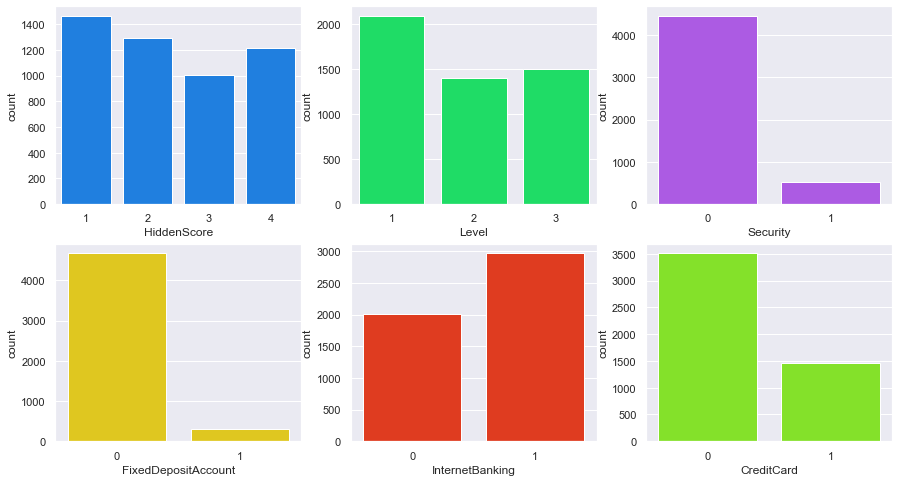

In [64]:
# plotting Count plots for All the categorical Columns in the Dataset 

color = sns.color_palette("gist_ncar",6)
fig, ax = plt.subplots(2,3)
fig.set_figheight(8)
fig.set_figwidth(15)

sns.countplot(data_customer['HiddenScore'],color=color[0],ax=ax[0][0])

sns.countplot(data_customer['Level'],color=color[1],ax=ax[0][1])

sns.countplot(data_customer['Security'],color=color[5],ax=ax[0][2])

sns.countplot(data_customer['FixedDepositAccount'],color=color[3],ax=ax[1][0])

sns.countplot(data_customer['InternetBanking'],color=color[4],ax=ax[1][1])

sns.countplot(data_customer['CreditCard'],color=color[2],ax=ax[1][2])

From Above count plots,we can see
    
    In HiddenScore column each category has nearly equal distribution and there are more customers from score 1 category.
    In Level column 2 and 3 level are nearly equal distribution and Level 1 customers are more when compare to other level customers.
    In Security column most of the customers doesnot have the security and very less people have security.
    In FixedDepositAccount column most of the customers doesn't have the fixed deposit account and we can see very few customers have the Fixed Deposit Account.
    In Internet banking column some customers uses Internetbanking and Some customers doesn't using Internet banking and using customers is little bit more than the not using customers.
    In creditcard column 70% of the customers doesn't using the Creditcards and 30% of the customers using the credit cards. 

#### Bivariate Analysis

### Categorical vs Numerical

Text(0.5, 1.0, 'Age bar Plot')

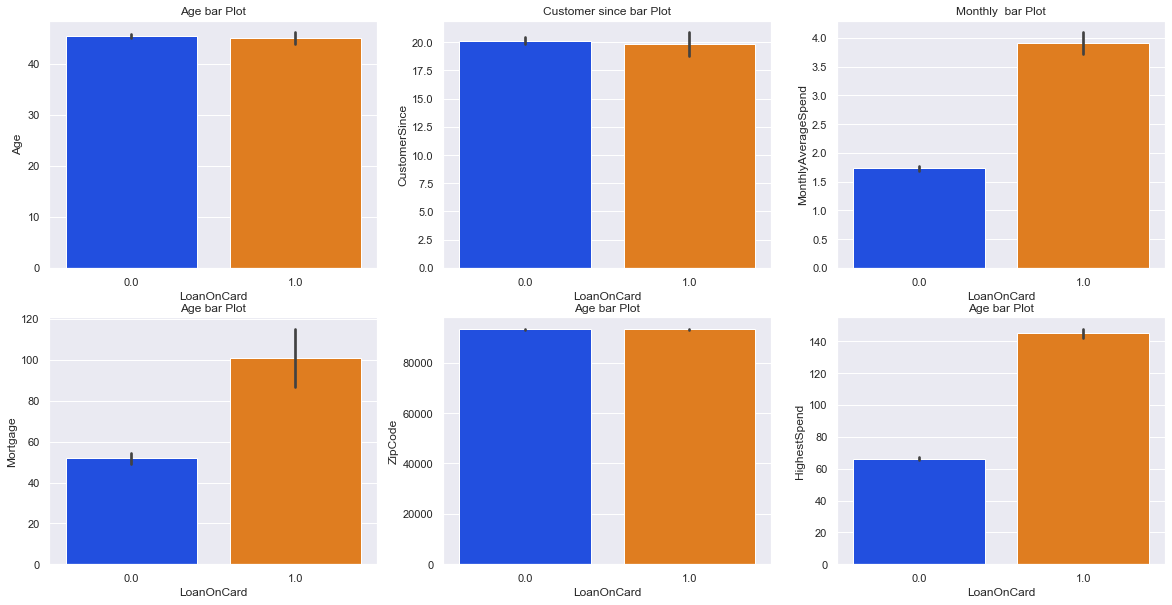

In [65]:
# setting the figure size
fig,ax = plt.subplots(2,3,figsize=(20,10))
sns.barplot(x=data_customer['LoanOnCard'], y=data_customer['Age'], ax=ax[0][0],palette='bright')
sns.barplot(x=data_customer['LoanOnCard'], y=data_customer['CustomerSince'],ax=ax[0][1],palette='bright')
sns.barplot(x=data_customer['LoanOnCard'], y=data_customer['MonthlyAverageSpend'],ax=ax[0][2],palette='bright')
sns.barplot(x=data_customer['LoanOnCard'], y=data_customer['Mortgage'],ax=ax[1][0],palette='bright')
sns.barplot(x=data_customer['LoanOnCard'], y=data_customer['ZipCode'],ax=ax[1][1],palette='bright')
sns.barplot(x=data_customer['LoanOnCard'], y=data_customer['HighestSpend'],ax=ax[1][2],palette='bright')

ax[0][0].set_title('Age bar Plot')
ax[0][1].set_title('Customer since bar Plot')
ax[0][2].set_title('Monthly  bar Plot')
ax[1][0].set_title('Age bar Plot')
ax[1][1].set_title('Age bar Plot')
ax[1][2].set_title('Age bar Plot')

### Numerical vs Numerical

<AxesSubplot:xlabel='MonthlyAverageSpend', ylabel='HighestSpend'>

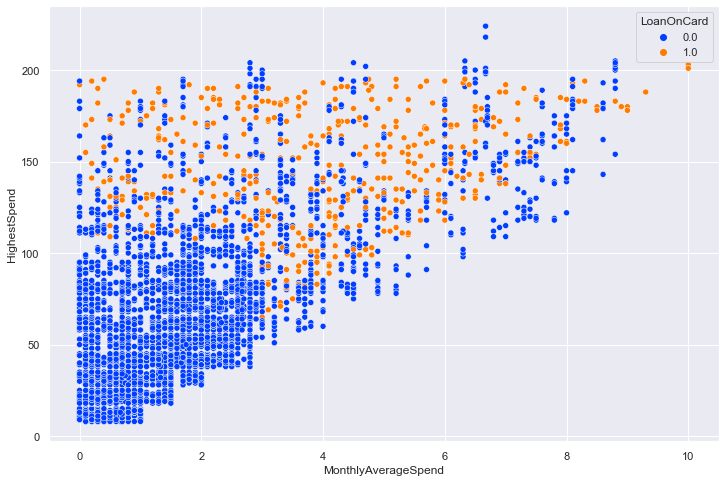

In [66]:
plt.figure(figsize = (12,8))
sns.scatterplot(y = data_customer['HighestSpend'],
                x=data_customer['MonthlyAverageSpend'],
                hue=data_customer['LoanOnCard'],
                palette='bright')

From above Scatterplot We can see most of the loan holder customers highestspend > 100 and Montlyaveragespend > 3 and we can see non loan holder customers are also with highestspend > 100 and Montlyaveragespend > 3. So if the customers of that range wants to take loan then the customers get approval on loan.

<AxesSubplot:xlabel='Age', ylabel='CustomerSince'>

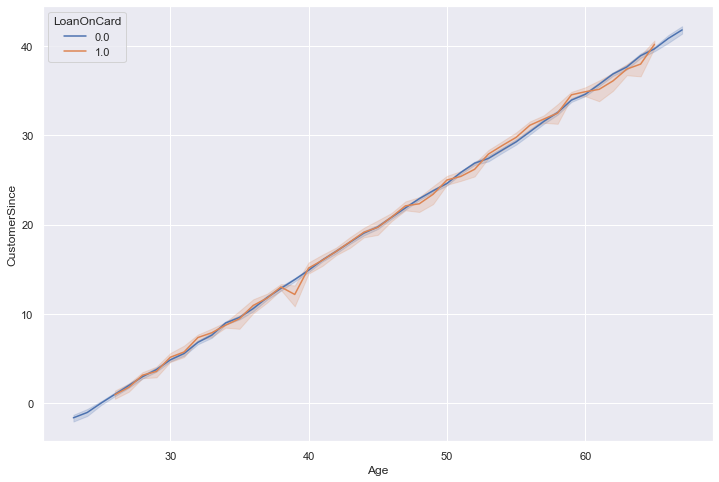

In [67]:
#Here we plotting a line plot.
plt.figure(figsize = (12,8))
sns.lineplot(x=data_customer['Age'],y=data_customer['CustomerSince'],hue=data_customer['LoanOnCard'])

### Categorical vs Categorical

<AxesSubplot:xlabel='FixedDepositAccount', ylabel='count'>

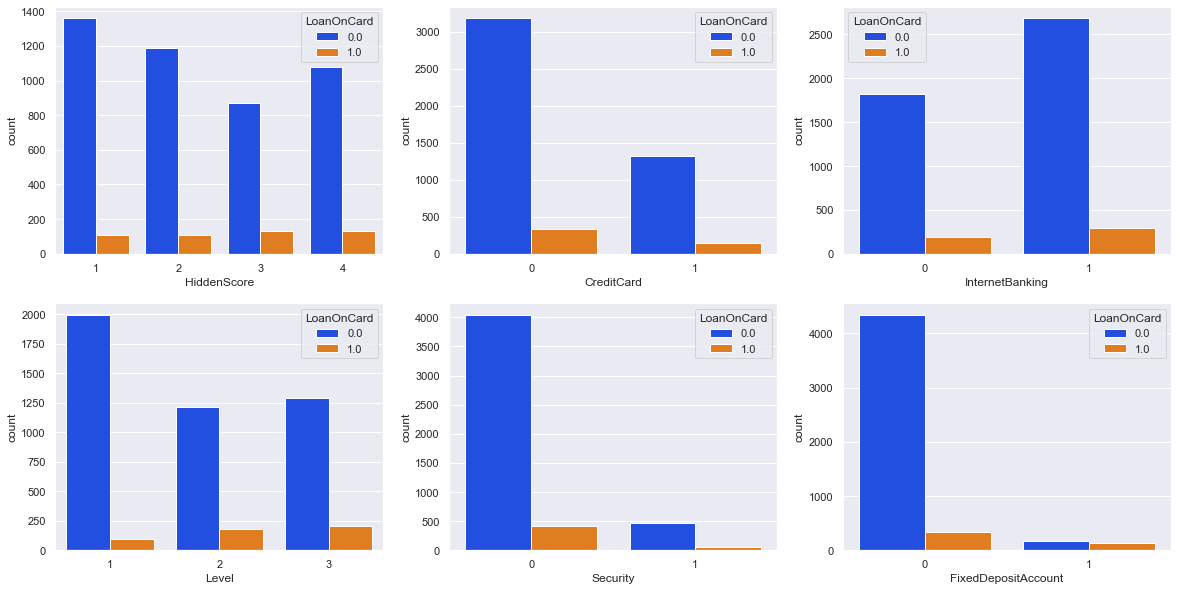

In [68]:
# setting the figure size
fig,ax = plt.subplots(2,3,figsize=(20,10))
sns.countplot(x=data_customer['HiddenScore'], hue=data_customer['LoanOnCard'], ax=ax[0][0],palette='bright')
sns.countplot(x=data_customer['CreditCard'], hue=data_customer['LoanOnCard'],ax=ax[0][1],palette='bright')
sns.countplot(x=data_customer['InternetBanking'], hue=data_customer['LoanOnCard'],ax=ax[0][2],palette='bright')
sns.countplot(x=data_customer['Level'], hue=data_customer['LoanOnCard'],ax=ax[1][0],palette='bright')
sns.countplot(x=data_customer['Security'], hue=data_customer['LoanOnCard'],ax=ax[1][1],palette='bright')
sns.countplot(x=data_customer['FixedDepositAccount'], hue=data_customer['LoanOnCard'],ax=ax[1][2],palette='bright')

#### Multivariate Anlysis

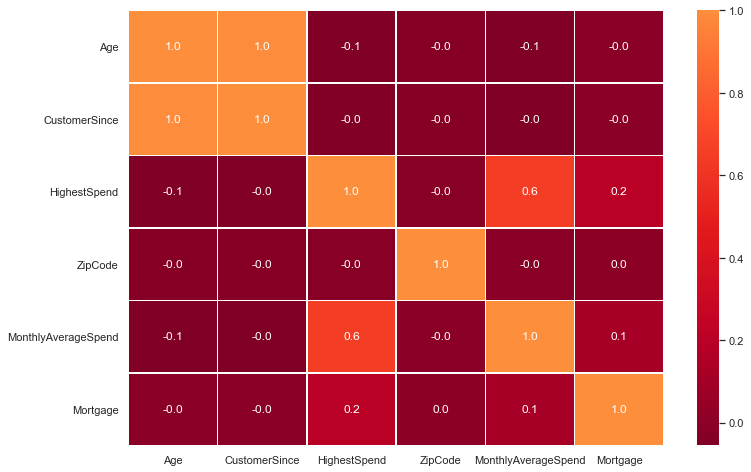

In [69]:
plt.figure(figsize=(12,8))
sns.heatmap(data_customer.corr(), annot=True, linewidths=.5, fmt= '.1f', center = 1,cmap='YlOrRd_r' )  # heatmap
plt.show()

 From Above heatmap We can see that there is high correlation between customersince and Age,Montly avg spend and highest spend have aslo some correlation.We see there no relation in the Zipcode Column.

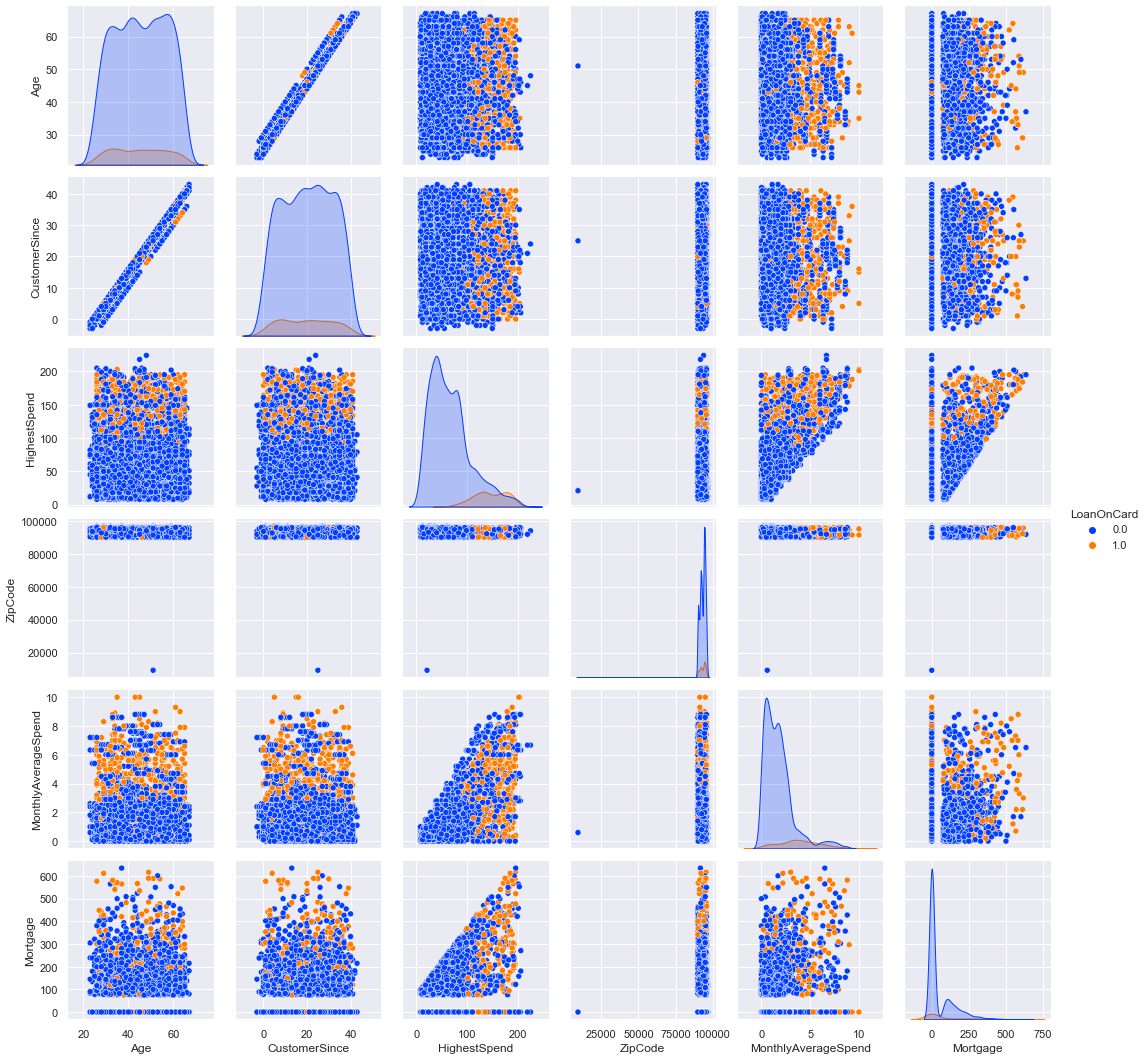

In [70]:
df = data_customer.select_dtypes(include=['int64','float64'])
df['LoanOnCard'] = data_customer['LoanOnCard']
sns.pairplot(data = df,hue='LoanOnCard',palette='bright')

 From Above pairplot We can see that Zipcode has no relation with other Columns So we can drop it when modeling.

### Statistical Anlysis

In [71]:
# mean of Attributes for Target Column

data_customer.groupby(['LoanOnCard']).mean()

# Observation : MontlyAverageSpend  is High for loan Customers.
# Highest Spend mean is having huge different for loan and non-loan Customers.
# Age mean is similar for loan and non_loan customers

,Age,CustomerSince,HighestSpend,ZipCode,MonthlyAverageSpend,Mortgage
LoanOnCard,,,,,,
0.0,45.383111,20.146889,66.290444,93152.337111,1.729849,51.869111
1.0,45.066667,19.843750,144.745833,93153.202083,3.905354,100.845833


Statistical Testing for continuous features with target variable.
Here we use two-sample unpaired t-test
* $H_0$: There is no significant difference for Continuous varibales with target varibale
* $H_A$: There is a significance difference for Continuous varibales with target varibale

In [72]:
# continuous variables list
num_col=list(data_customer.select_dtypes(include=['int64','float64']).columns)

for i in num_col:
    group1 = np.array(data_customer[data_customer.LoanOnCard == 0][i]) 
    group2 = np.array(data_customer[data_customer.LoanOnCard == 1][i])
    t, p_value  = ttest_ind(group1,group2, axis = 0,equal_var=False) 
    print('P_Value:',float(p_value))
    if p_value < 0.05:  # Setting our significance level at 5%
        print('Rejecting Null Hypothesis',i,'of Loan holders and non-Loan holders are not same.')
    else:
        print('Fail to Reject Null Hypothesis',i,'of Loan holders and non-Loan holders are  same.')
    print('\n')

P_Value: 0.5694160158774422
Fail to Reject Null Hypothesis Age of Loan holders and non-Loan holders are  same.


P_Value: 0.5855242526574542
Fail to Reject Null Hypothesis CustomerSince of Loan holders and non-Loan holders are  same.


P_Value: 1.527529731162187e-227
Rejecting Null Hypothesis HighestSpend of Loan holders and non-Loan holders are not same.


P_Value: 0.9920253364424511
Fail to Reject Null Hypothesis ZipCode of Loan holders and non-Loan holders are  same.


P_Value: 2.414409993123105e-77
Rejecting Null Hypothesis MonthlyAverageSpend of Loan holders and non-Loan holders are not same.


P_Value: 1.3389598194359617e-10
Rejecting Null Hypothesis Mortgage of Loan holders and non-Loan holders are not same.




From Above Analysis We can say  that three columns Age,Customer-since,Zipcode are not have effect on target varibale.So drop this columns.

In [73]:
# droping columns of Age,Customer-since,Zipcode

data_customer.drop(['Age','CustomerSince','ZipCode'],axis=1,inplace=True)

Statistical Analysis For categorical variables with target variable.Here we use Chi-square tests of independence.
* $H_0$: There is no significant difference for categorical variables with target varibales
* $H_A$: There is a significance difference for categorical variables with target varibales

In [74]:

cat_col=list(data_customer.select_dtypes(include=['category']).columns)

for i in cat_col:
    crosstab=pd.crosstab(data_customer['LoanOnCard'],data_customer[i])
    chi,p_value,dof,expected=chi2_contingency(crosstab)
     
    print('P_Value:',p_value)
    if p_value < 0.05:  # Setting our significance level at 5%
        print('Rejecting Null Hypothesis. There is significant difference in',i,'with Loan on card')
    else:
        print('Fail to Reject Null Hypothesis. There is no significant difference in',i,'with Loan on card')
    print('\n')

P_Value: 1.5107064617649127e-06
Rejecting Null Hypothesis. There is significant difference in HiddenScore with Loan on card


P_Value: 6.123126393086782e-25
Rejecting Null Hypothesis. There is significant difference in Level with Loan on card


P_Value: 0.14081888843711285
Fail to Reject Null Hypothesis. There is no significant difference in Security with Loan on card


P_Value: 2.8419681700339666e-109
Rejecting Null Hypothesis. There is significant difference in FixedDepositAccount with Loan on card


P_Value: 0.7062815708093111
Fail to Reject Null Hypothesis. There is no significant difference in InternetBanking with Loan on card


P_Value: 0.8994965480984771
Fail to Reject Null Hypothesis. There is no significant difference in CreditCard with Loan on card


P_Value: 0.0
Rejecting Null Hypothesis. There is significant difference in LoanOnCard with Loan on card




 From Above Analysis We can say  that three columns credit-card,internetbanking,security are not have effect on target varibale.So drop this columns

In [75]:
# drop the categorical columns(credit-card,internetbanking,security)

data_customer.drop(['CreditCard','InternetBanking','Security'],axis=1,inplace=True)

### 4. Data Preprocessing

From above Visualizations We can see that there are ome outliers in the data.
So, impute outliers with the mean.

In [76]:
# From Above plots We seen there are outliers in the Dataset
# replace the outliers with the mean of the data.

columns = ['HighestSpend','MonthlyAverageSpend','Mortgage']

for col in columns:
    # 1st quartile
    Q1 = np.percentile(data_customer[col],25)
    # 3rd quartile
    Q3 = np.percentile(data_customer[col],75)
    # IQR
    IQR = Q3 - Q1
    # upper Bound
    upper = Q3 + 1.5*IQR
    # Lower bound
    lower = Q1-1.5*IQR
    # Count for Outliers before converting
    Outliers=[i for i in data_customer[col] if i < lower or i > upper]
    print(i)
    print('Outliers Before replacing Mean:',len(Outliers))
    
    # replacing median in outliers
    data_customer[col]= data_customer[col].mask(data_customer[col] > upper, data_customer[col].mean())
    data_customer[col]= data_customer[col].mask(data_customer[col] < lower, data_customer[col].mean())
    
        
    Outliers=[i for i in data_customer[col] if i < lower or i > upper]
    
    print('Outliers After replacing Median',len(Outliers),'\n\n')

LoanOnCard
Outliers Before replacing Mean: 96
Outliers After replacing Median 0 


LoanOnCard
Outliers Before replacing Mean: 324
Outliers After replacing Median 0 


LoanOnCard
Outliers Before replacing Mean: 291
Outliers After replacing Median 0 




<AxesSubplot:xlabel='Mortgage'>

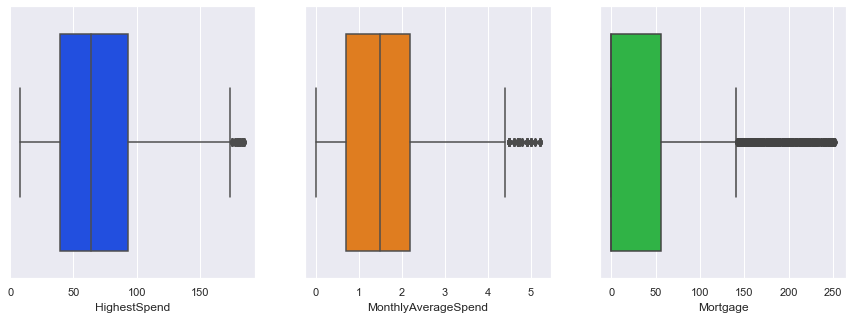

In [77]:
# plotting For plots for All the independent Columns in the Dataset 

color = sns.color_palette("bright",3)
fig, ax = plt.subplots(1,3)
fig.set_figheight(5)
fig.set_figwidth(15)

sns.boxplot(data_customer['HighestSpend'],color=color[0],ax=ax[0])

sns.boxplot(data_customer['MonthlyAverageSpend'],color=color[1],ax=ax[1])

sns.boxplot(data_customer['Mortgage'],color=color[2],ax=ax[2])

In [78]:
# Arrange data into independent variables and dependent variables

X=data_customer.drop(columns='LoanOnCard')
y=data_customer['LoanOnCard'] #target

#### Checking for target imbalance.

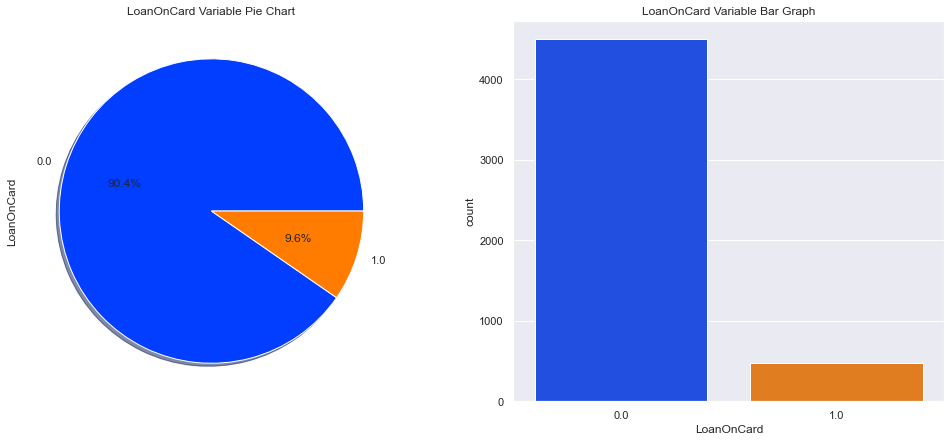

In [79]:
# Checking for target Balancing

color=sns.color_palette('bright')
f,axes=plt.subplots(1,2,figsize=(17,7))
data_customer['LoanOnCard'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0],shadow=True,colors=color)
sns.countplot(data_customer['LoanOnCard'],ax=axes[1],palette='bright')
axes[0].set_title('LoanOnCard Variable Pie Chart')
axes[1].set_title('LoanOnCard Variable Bar Graph')
plt.show()

##### There is a Huge Imbalance in the target variable. So we need balance the target Variable. Because Imbalance of target Variable will lead to misclassification of the target values. To Balance the target Varibale we can use resmapling techinques called, Oversampling,undersampling.Here we use Oversampling Beacuse undersampling may remove important information from the data.

In [80]:
# balancing the target variable using SMOTE
smote_nc=SMOTENC(categorical_features=[1,3,5],random_state=1) #specifying categorical column numbers
X_s,y_s=smote_nc.fit_resample(X,y)

In [81]:
print('Before sampling:')
print(y.value_counts())

Before sampling:
0.0    4500
1.0     480
Name: LoanOnCard, dtype: int64


In [82]:
print('After sampling:')
print(y_s.value_counts())

After sampling:
1.0    4500
0.0    4500
Name: LoanOnCard, dtype: int64


In [83]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.30, random_state=1)

### 5. Model training, Testing and Tuning:

In [84]:
# Applying Logistic Regression.

logit = LogisticRegression()

logit.fit(X_train, y_train)

logit_pred = logit.predict(X_test)
logit_p = logit.predict_proba(X_test)

print('Accuracy on Training data:',logit.score(X_train, y_train) )
print('Accuracy on Test data:',logit.score(X_test, y_test) )
print("\nclassification  Report For Logistic regression:\n",metrics.classification_report(y_test,logit_pred))

Accuracy on Training data: 0.8849206349206349
Accuracy on Test data: 0.8818518518518519

classification  Report For Logistic regression:
               precision    recall  f1-score   support

         0.0       0.88      0.89      0.88      1332
         1.0       0.89      0.88      0.88      1368

    accuracy                           0.88      2700
   macro avg       0.88      0.88      0.88      2700
weighted avg       0.88      0.88      0.88      2700



#### Observation:
    for Non loan holder custmers there is 88% of predictions were correct, 89% of positives are predicted Correct, 88% of positive predictions were correct and 1332 Occurances in the dataset.
    for loan holder custmers there is 89% of predictions were correct, 88% of positives are predicted Correct, 88% of positive predictions were correct and 1368 Occurances in the dataset.
    
    We get nearly 90% recall So it will tell This model is performed well.

<AxesSubplot:>

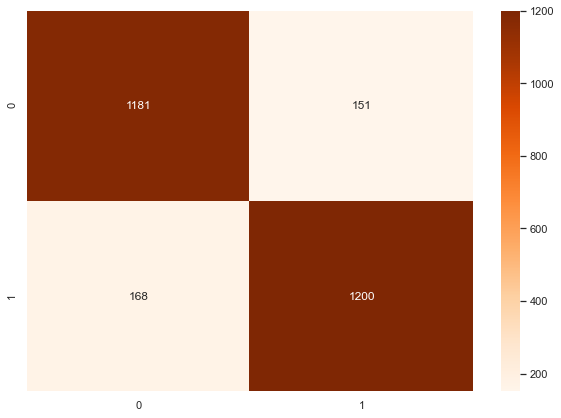

In [85]:
# Display confusion matrix
conf_mat = metrics.confusion_matrix(y_test, logit_pred)
df_conf_mat = pd.DataFrame(conf_mat)
plt.figure(figsize = (10,7))
sns.heatmap(df_conf_mat, annot=True,cmap='Oranges', fmt='g')

 Observation : From above matrix we can see There are 1181 true positives and 1200 false Negatives for logistic regression Model.

In [86]:
# Apply Naive Bayes Classifier.

NB = GaussianNB()
NB.fit(X_train,y_train.ravel())

NB_predict = NB.predict(X_test)

print('Accuracy on Training data:',NB.score(X_train, y_train) )
print('Accuracy on Test data:',NB.score(X_test, y_test) )
print("\nclassification  Report For Naive Bayes Classifier:\n",metrics.classification_report(y_test,NB_predict))

Accuracy on Training data: 0.8584126984126984
Accuracy on Test data: 0.8562962962962963

classification  Report For Naive Bayes Classifier:
               precision    recall  f1-score   support

         0.0       0.84      0.87      0.86      1332
         1.0       0.87      0.84      0.86      1368

    accuracy                           0.86      2700
   macro avg       0.86      0.86      0.86      2700
weighted avg       0.86      0.86      0.86      2700



#### Observation:
    for Non loan holder custmers there is 84% of predictions were correct, 87% of positives are predicted Correct, 86% of positive predictions were correct and 1332 Occurances in the dataset.
    for loan holder custmers there is 87% of predictions were correct, 84% of positives are predicted Correct, 86% of positive predictions were correct and 1368 Occurances in the dataset.
    
    We get nearly 85% recall which is little bit less than the reccall When compare To logistic regression.
    So Logistic regression is best model than Naive Bayes Classifier.

<AxesSubplot:>

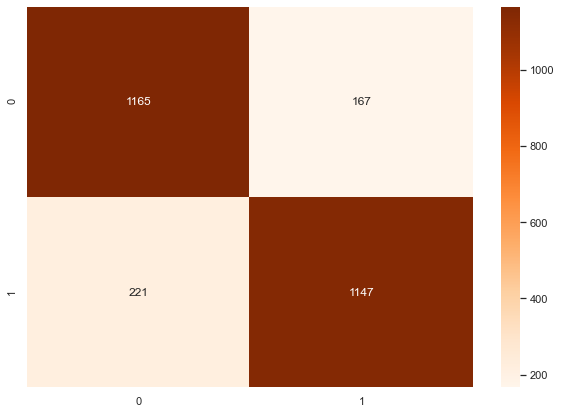

In [87]:
# Display confusion matrix
conf_mat = metrics.confusion_matrix(y_test, NB_predict)
df_conf_mat = pd.DataFrame(conf_mat)
plt.figure(figsize = (10,7))
sns.heatmap(df_conf_mat, annot=True,cmap='Oranges', fmt='g')

 Observation : From above matrix we can see There are 1165 true positives and 1147 false Negatives for Naive bayes clasifier Model.

#### Tunning

#####  we do smote on entire data it may leak information to validation data as well. we need to test the model with unseen information. so we will do sampling only on training data.

In [88]:
# Lets do Sampling for training data.

X=data_customer.drop(columns='LoanOnCard')
y=data_customer['LoanOnCard'] #target

# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

smote_nc=SMOTENC(categorical_features=[1,3,5],random_state=1)
X_train_s, y_train_s = smote_nc.fit_resample(X_train, y_train)

In [89]:
# Applying Logistic Regression.

logit = LogisticRegression()

logit.fit(X_train_s, y_train_s)

logit_pred = logit.predict_proba(X_test)

logit_p = logit.predict(X_test)

print('Accuracy on Training data:',logit.score(X_train_s, y_train_s) )
print('Accuracy on Test data:',logit.score(X_test, y_test) )
print("\nclassification  Report For Logistic regression:\n",metrics.classification_report(y_test,logit_p))

Accuracy on Training data: 0.8686293130737576
Accuracy on Test data: 0.8708165997322623

classification  Report For Logistic regression:
               precision    recall  f1-score   support

         0.0       0.99      0.87      0.92      1341
         1.0       0.44      0.91      0.59       153

    accuracy                           0.87      1494
   macro avg       0.71      0.89      0.76      1494
weighted avg       0.93      0.87      0.89      1494



Observation : We can see if we perform smote only on train data we get Less percision and high recall Value on Loanholder Customers

In [90]:
# Apply Naive Bayes Classifier.

NB = GaussianNB()
NB.fit(X_train_s,y_train_s.ravel())

NB_predict = NB.predict_proba(X_test)
NB_p = NB.predict(X_test)

print('Accuracy on Training data:',NB.score(X_train_s, y_train_s) )
print('Accuracy on Test data:',NB.score(X_test, y_test) )
print("\nclassification  Report For Naive Bayes Classifier:\n",metrics.classification_report(y_test,NB_p))

Accuracy on Training data: 0.8526432415321304
Accuracy on Test data: 0.8768406961178046

classification  Report For Naive Bayes Classifier:
               precision    recall  f1-score   support

         0.0       0.98      0.88      0.93      1341
         1.0       0.45      0.86      0.59       153

    accuracy                           0.88      1494
   macro avg       0.71      0.87      0.76      1494
weighted avg       0.93      0.88      0.89      1494



Observation : As With naive bayes model also percision value is decreased and Recall value is increased but the accuracy is less than the Logistic model.

#### Find Other Supervised Models

In [91]:
svm_model = svm.SVC(gamma=0.025, C=3,probability=True)
svm_model.fit(X_train_s,y_train_s)
svm_predict = svm_model.predict_proba(X_test)
svm_p = svm_model.predict(X_test)
print('Accuracy on Training data:',svm_model.score(X_train_s, y_train_s) )
print('Accuracy on Test data:',svm_model.score(X_test, y_test) )
print("\nclassification  Report For Naive Bayes Classifier:\n",metrics.classification_report(y_test,svm_p))

Accuracy on Training data: 0.9601139601139601
Accuracy on Test data: 0.927710843373494

classification  Report For Naive Bayes Classifier:
               precision    recall  f1-score   support

         0.0       0.99      0.93      0.96      1341
         1.0       0.60      0.88      0.71       153

    accuracy                           0.93      1494
   macro avg       0.79      0.90      0.84      1494
weighted avg       0.95      0.93      0.93      1494



Observation : When we perform SVM recall value is better than the logistic.We got Accuracy of 93% on test data With recall of 0.88.But in 0 class precision is greater than the recall which gives the misclassification of the model.

In [92]:
KNN_model=KNeighborsClassifier(n_neighbors=9)
KNN_model.fit(X_train_s,y_train_s)
KNN_predict = KNN_model.predict_proba(X_test)
KNN_p = KNN_model.predict(X_test)
print('Accuracy on Training data:',KNN_model.score(X_train_s, y_train_s) )
print('Accuracy on Test data:',KNN_model.score(X_test, y_test) )
print("\nclassification  Report For Naive Bayes Classifier:\n",metrics.classification_report(y_test,KNN_p))

Accuracy on Training data: 0.940804051915163
Accuracy on Test data: 0.8848728246318608

classification  Report For Naive Bayes Classifier:
               precision    recall  f1-score   support

         0.0       0.98      0.89      0.93      1341
         1.0       0.47      0.86      0.61       153

    accuracy                           0.88      1494
   macro avg       0.72      0.88      0.77      1494
weighted avg       0.93      0.88      0.90      1494



Observation : When we perform KNN it gives accuracy of 88% on test data.With low percision and high recall value in class 1 label.

 Observation : From above all models We can see logistic regression is best model because it has less Percision and high Recall values.Where Svm has high accuracy than other models but percision value is high wehre compare to other models.

#### Finding best Cross Validate Accuracy model

In [93]:
LR_model=LogisticRegression()
KNN_model=KNeighborsClassifier(n_neighbors=9)
NB_model=GaussianNB()
svm_model = svm.SVC(gamma=0.025, C=3,probability=True)

# calculate cross-validated AUC
# prepare models
models = []
models.append(('Logistic Regression', LR_model))
models.append(('K Nearest Nesighbors', KNN_model))
models.append(('Naive Bayes', NB_model))
models.append(('Support Vector Machine', svm_model))
for name,model in models:
    aucc = cross_val_score(model, X, y, cv=10, scoring='roc_auc').mean()
    print('For ',name,':',aucc)

For  Logistic Regression : 0.9518287037037038
For  K Nearest Nesighbors : 0.9212453703703704
For  Naive Bayes : 0.9284444444444444
For  Support Vector Machine : 0.929037037037037


From above model we can see that logistic regression has highest Cross validate Accuracy.

#### Find the Area under the Roc for all models

In [94]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('\nFor',threshold,'threshold :')
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [95]:
# Compute ROC curve and area the curve for logistic regression
fpr1, tpr1, thresholds1 = roc_curve(y_test, logit_pred[:,1])
roc_auc1 = auc(fpr1, tpr1)
print("Area under the ROC curve For Logistic Regression : %f" % roc_auc1)

fpr, tpr, thresholds = fpr1, tpr1, thresholds1

evaluate_threshold(0.5)  # when threshold is 0.5

evaluate_threshold(0.2)  # when threshold is 0.2

Area under the ROC curve For Logistic Regression : 0.958888

For 0.5 threshold :
Sensitivity: 0.9084967320261438
Specificity: 0.8672632363907532

For 0.2 threshold :
Sensitivity: 0.9673202614379085
Specificity: 0.7211036539895601


In [96]:
# Compute ROC curve and area the curve for Naive bayes
fpr2, tpr2, thresholds2 = roc_curve(y_test, NB_predict[:,1])
roc_auc2 = auc(fpr2, tpr2)
print("Area under the ROC curve For Naive Bayes : %f" % roc_auc2)

fpr, tpr, thresholds = fpr2, tpr2, thresholds2

evaluate_threshold(0.5)  # when threshold is 0.5

evaluate_threshold(0.2)  # when threshold is 0.2

Area under the ROC curve For Naive Bayes : 0.935138

For 0.5 threshold :
Sensitivity: 0.8562091503267973
Specificity: 0.8829231916480239

For 0.2 threshold :
Sensitivity: 0.9150326797385621
Specificity: 0.7926920208799404


In [97]:
# Compute ROC curve and area the curve for svc
fpr3, tpr3, thresholds3 = roc_curve(y_test, svm_predict[:,1])
roc_auc3 = auc(fpr3, tpr3)
print("Area under the ROC curve for SVC : %f" % roc_auc3)

fpr, tpr, thresholds = fpr3, tpr3, thresholds3

evaluate_threshold(0.5)  # when threshold is 0.5

evaluate_threshold(0.2)  # when threshold is 0.2

Area under the ROC curve for SVC : 0.969747

For 0.5 threshold :
Sensitivity: 0.8431372549019608
Specificity: 0.9463087248322147

For 0.2 threshold :
Sensitivity: 0.9084967320261438
Specificity: 0.9149888143176734


In [98]:
# Compute ROC curve and area the curve for KNN
fpr4, tpr4, thresholds4 = roc_curve(y_test, KNN_predict[:,1])
roc_auc4 = auc(fpr4, tpr4)
print("Area under the ROC curve for KNN : %f" % roc_auc4)

fpr, tpr, thresholds = fpr4, tpr4, thresholds4

evaluate_threshold(0.5)  # when threshold is 0.5

evaluate_threshold(0.2)  # when threshold is 0.2

Area under the ROC curve for KNN : 0.935937

For 0.5 threshold :
Sensitivity: 0.8627450980392157
Specificity: 0.8873974645786726

For 0.2 threshold :
Sensitivity: 0.9411764705882353
Specificity: 0.7554064131245339


Observation : From Above AUC scores SVM has high score but it has high percision value than the recall So We can say Logistic reagression Will be the best model for this data.Because it has 95% AUC Score and recall value is high when threshold is 0.2

#### plotting Roc curves for All models

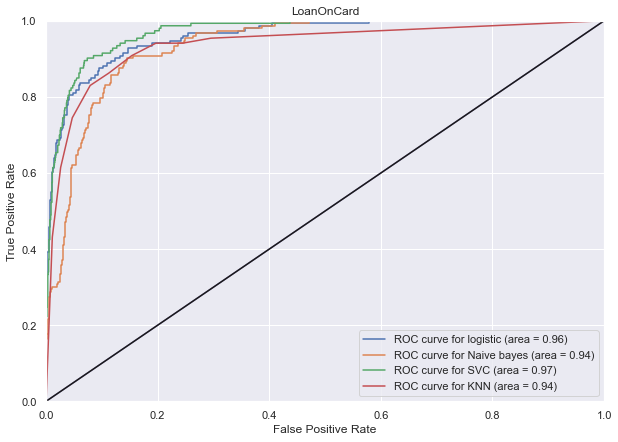

In [99]:
# Plot ROC curve
plt.figure(figsize=(10,7))
plt.clf()
plt.plot(fpr1, tpr1, label='ROC curve for logistic (area = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, label='ROC curve for Naive bayes (area = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, label='ROC curve for SVC (area = %0.2f)' % roc_auc3)
plt.plot(fpr4, tpr4, label='ROC curve for KNN (area = %0.2f)' % roc_auc4)
plt.plot([0, 1], [0, 1],[0,1], 'k')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LoanOnCard')
plt.legend(loc="lower right")
plt.show()

Observation : From above plot we can see SVM has high area under ROC and Logistic model also perform well.

### 6. Conclusion & Improvisation:

#### Conclusion

    We can select Linear Regression as final model beacuse it perform well on recall and Also in ROC and AUC.
    After Apllying Smote function to train data accuracy is increased on both the models.
    recall value is high in logistic regression when compare to Naive bayes.After performing smote on train data we can see there is less no of false negative
    percision value is decreased in All models expect SVM when we decrease the threshold value.
    

#### Improvisation

1. Data has Huge imblance on target varibale it may lead to decrease the Accuracy so Same no of observations on target varible will increase the accuracy.
2. From our Analysis we see that Few customers does't have credit card but those customer having loan on card. This data error should be avoided.
3. In our data Zipcode means area code which is not useful for analysis.
4. If data contains the type of account(current,savings) can be used for anlysis.
5. Mortgage is not used for Analysis.
